<a href="https://colab.research.google.com/github/Ashi743/ML-practices/blob/main/stochasitic_gd_%26_Logreg.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [25]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.datasets import make_regression
from sklearn.model_selection import train_test_split

In [11]:
from re import I
list_= [1,2,3,4,5,8,9,8]
arr_= np.array(list_)
arr_
#bubble sort
for i in range(len(arr_)):
  for j in range(len(arr_)-1):
    if arr_[j]>arr_[j+1]:
      arr_[j],arr_[j+1]=arr_[j+1],arr_[j]
arr_

array([1, 2, 3, 4, 5, 8, 8, 9])

In [17]:
x,y= make_regression(n_samples=100, n_features=1,
                     n_informative=1, noise=15, random_state=42)
x.shape

(100, 1)

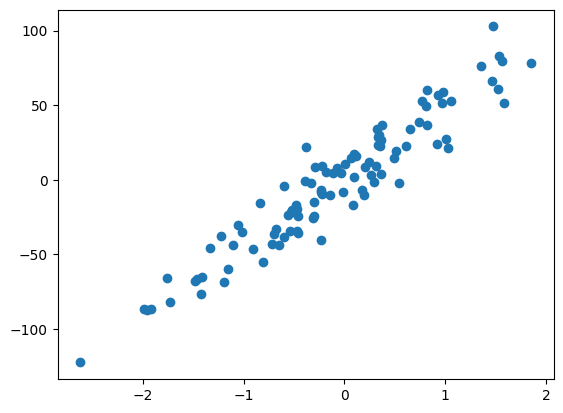

In [18]:
plt.scatter(x,y)

In [19]:
from sklearn.linear_model import LinearRegression
lr=LinearRegression()
lr.fit(x,y)
print(lr.coef_)
print(lr.intercept_)

[45.78520483]
1.7476729807904583


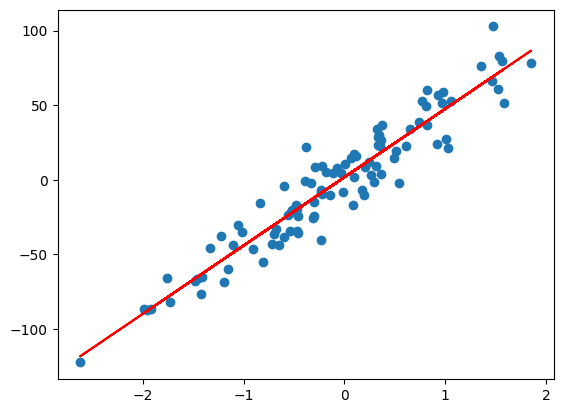

In [20]:
plt.scatter(x,y)
plt.plot(x,lr.predict(x),color='r')

In [79]:
from sklearn.datasets import load_diabetes
diabetes= load_diabetes()
x= pd.DataFrame(diabetes.data, columns=diabetes.feature_names)
x.head()
y= diabetes.target
y.shape

(442,)

In [86]:
a,b= load_diabetes(return_X_y=True)

In [87]:
x_train,x_test,y_train,y_test= train_test_split(a,b,
                                                test_size=0.2,random_state=42)

In [81]:
lr=LinearRegression()
lr.fit(x_train,y_train)
print(lr.coef_)
print(lr.intercept_)
from sklearn.metrics import r2_score
y_pred= lr.predict(x_test)
r2_score(y_test,y_pred)

[  37.90402135 -241.96436231  542.42875852  347.70384391 -931.48884588
  518.06227698  163.41998299  275.31790158  736.1988589    48.67065743]
151.34560453985995


0.4526027629719195

In [88]:
x_train.shape
y_train.shape

(353,)

In [83]:
x_train.values

array([[ 0.07076875,  0.05068012,  0.01211685, ...,  0.03430886,
         0.02736405, -0.0010777 ],
       [-0.00914709,  0.05068012, -0.01806189, ...,  0.07120998,
         0.00027248,  0.01963284],
       [ 0.00538306, -0.04464164,  0.04984027, ..., -0.00259226,
         0.01703607, -0.01350402],
       ...,
       [ 0.03081083, -0.04464164, -0.02021751, ..., -0.03949338,
        -0.01090325, -0.0010777 ],
       [-0.01277963, -0.04464164, -0.02345095, ..., -0.00259226,
        -0.03845972, -0.03835666],
       [-0.09269548, -0.04464164,  0.02828403, ..., -0.03949338,
        -0.00514219, -0.0010777 ]])

In [100]:
import numpy as np
from sklearn.base import BaseEstimator, RegressorMixin
from sklearn.metrics import r2_score

class sgd(BaseEstimator, RegressorMixin):
    def __init__(self, lr=0.01, epoch=100):
        self.lr = lr
        self.epoch = epoch
        self.m = None
        self.b = None

    def fit(self, x_train, y_train):
        self.m = np.ones(x_train.shape[1])
        self.b = 0

        for _ in range(self.epoch):
            for j in range(x_train.shape[0]):
                idx = np.random.randint(0, x_train.shape[0])
                y_pred = np.dot(x_train[idx], self.m) + self.b
                grad_m = -2 * np.dot((y_train[idx] - y_pred), x_train[idx])
                grad_b = -2 * (y_train[idx] - y_pred)

                self.m = self.m - self.lr * grad_m
                self.b = self.b - self.lr * grad_b
        return self

    def predict(self, x_test):
        return np.dot(x_test, self.m) + self.b

    def score(self, x_test, y_test):
        y_pred = self.predict(x_test)
        return r2_score(y_test, y_pred)


In [66]:
x_train.values.dtype

dtype('float64')

In [103]:
m1=sgd()
m1.fit(x_train,y_train)
y_pred= m1.predict(x_test)
r2_score(y_test,y_pred)

0.44376048191282025

logistic regression


In [105]:
#perceptron
from sklearn.datasets import make_classification
import numpy as np
import matplotlib.pyplot as plt

In [114]:
x,y= make_classification(n_samples=100, n_features=2,
                         n_informative=1, n_redundant=0,n_classes= 2,
                         n_clusters_per_class=1, random_state=40)

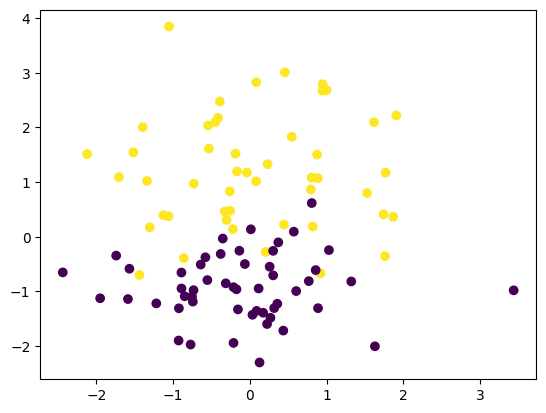

In [115]:
plt.scatter(x[:,0],x[:,1],c=y)

In [116]:
def sigmoid(z):
  return 1/(1+np.exp(-z))

In [117]:
x.shape

(100, 2)

In [119]:
np.insert(x, 0,1, axis= 1).shape

(100, 3)

In [136]:
def perceptron(x,y):
  x= np.insert(x, 0,1, axis= 1)
  w= np.ones(x.shape[1])
  lr=0.1
  epochs= 100
  for i in range(epochs):
    j= np.random.randint(0,100)
    y_hat= step(np.dot(x[j],w))

    w=w+lr*(y[j]-y_hat)*x[j]

  return w[0], w[1:]

In [120]:
def step(z):
  return 1 if z>=0 else 0

In [121]:
np.dot(x[2],np.ones(x.shape[1]))

-1.2516944845931683

In [137]:
perceptron(x,y)

(1.3877787807814457e-16, array([0.39847118, 1.20821816]))

In [123]:
x[2].shape

(2,)

In [131]:
np.ones(x.shape[1]).reshape(-1,1).T.shape

(1, 2)

In [133]:
np.ones(x.shape[1]).reshape(-1,1).T * x[2].reshape(-1,1)

array([[-0.86025976, -0.86025976],
       [-0.39143472, -0.39143472]])

In [141]:
intercept, coef= perceptron(x,y)
m=coef[0]/coef[1]
c=intercept/coef[1]
print(m,c)

0.11458653447683595 0.14985774207615662


In [142]:
x_input=np.linspace(-3,3,100)
y_input= m*x_input+c

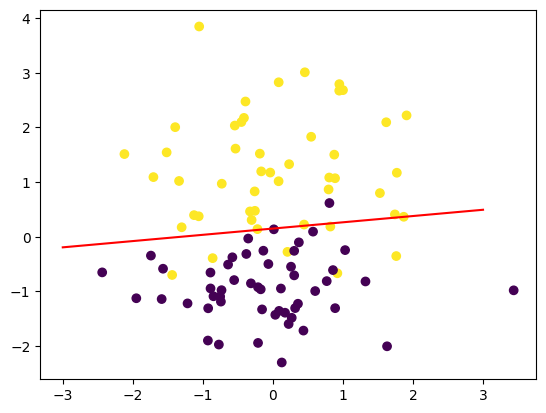

In [143]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_input,y_input,color='r')

In [144]:
from sklearn.linear_model import LogisticRegression
lor = LogisticRegression()
lor.fit(x,y)

LogisticRegression()

In [148]:
lor.coef_.shape

(1, 2)

In [147]:
lor.intercept_

array([0.04934767])

In [149]:
m = -(lor.coef_[0][0]/lor.coef_[0][1])
b = -(lor.intercept_/lor.coef_[0][1])

In [150]:
x_input1=np.linspace(-3,3,100)
y_input1= m*x_input+b

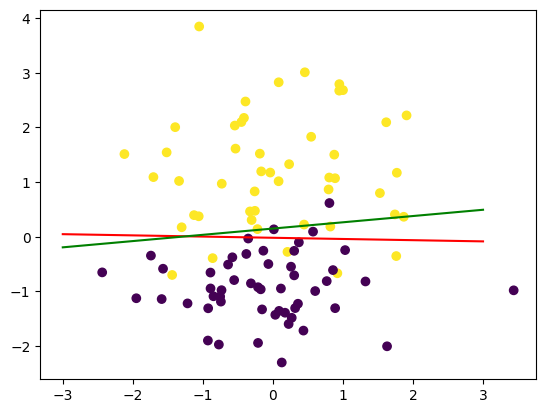

In [151]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_input1,y_input1,color='r')
plt.plot(x_input,y_input,color='g')

In [154]:
def perceptronsigma(X,y):

    X = np.insert(X,0,1,axis=1)
    weights = np.ones(X.shape[1])
    lr = 0.1

    for i in range(1000):
        j = np.random.randint(0,100)
        y_hat = sigmoid(np.dot(X[j],weights))
        weights = weights + lr*(y[j]-y_hat)*X[j]

    return weights[0],weights[1:]

In [153]:
def sigmoid(z):
    return 1/(1 + np.exp(-z))


In [155]:
perceptronsigma(x,y)

(0.20740666026117813, array([0.30374961, 3.4284766 ]))

In [158]:
intercept, coeff= perceptronsigma(x,y)
print(intercept, coeff)

0.43458196336701777 [0.32592493 3.46828073]


In [159]:
m2=coeff[0]/coeff[1]
c2=intercept/coeff[1]
print(m2,c2)

0.09397305431620506 0.12530184189024282


In [160]:
x_input3=np.linspace(-3,3,100)
y_input3= m2*x_input+c2

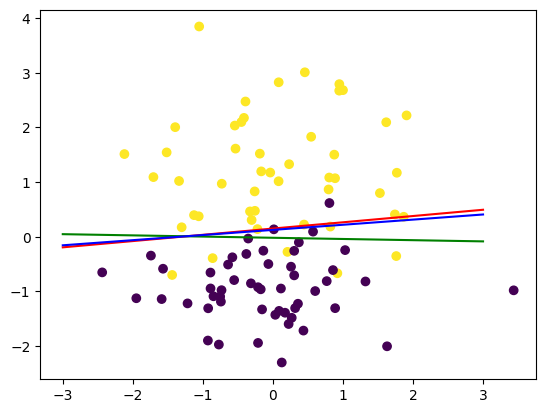

In [161]:
plt.scatter(x[:,0],x[:,1],c=y)
plt.plot(x_input,y_input,color='r')
plt.plot(x_input1,y_input1,color='g')
plt.plot(x_input3,y_input3,color='b')
